In [70]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Input, Dense,Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_Faulty_Training.RData')['faulty_training']

In [3]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


# Scale the dataset

In [130]:
# Initialize a StandardScaler object
sc = StandardScaler()

# Filter the DataFrame to only include data from the first simulation run
data = DF[DF['faultNumber']==0]
# Select the rows from the reduced dataset that have faultNumber equal to 0, and extract the feature values
fault_free = data[(data['faultNumber'] == 0)].iloc[:, 3:]

# Fit the StandardScaler object to the feature values of the fault-free data
sc.fit(fault_free)


StandardScaler()

In [132]:
reduced_data = DF[(DF['simulationRun'] >= 1) & (DF['simulationRun'] <= 50)]
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

X = sc.transform(reduced_data[reduced_data['sample']>20].iloc[:,3:])
Y = reduced_data[reduced_data['sample']>20]['faultNumber'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(Y.reshape(-1, 1))

Y_enc = enc.transform(Y.reshape(-1, 1))

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [134]:
y_train.shape

(345600, 18)

# Train the Neural Network algorithms

In [135]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input layer
inputs = Input(shape=(x_train.shape[1],))

# Define hidden layer with 16 nodes and ReLU activation function
hidden_layer = Dense(100, activation='relu')(inputs)
hidden_layer = Dense(100, activation='relu')(hidden_layer)
# Define output layer with sigmoid activation function for binary classification
outputs = Dense(y_train.shape[1], activation='softmax')(hidden_layer)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 52)]              0         
                                                                 
 dense_28 (Dense)            (None, 100)               5300      
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 18)                1818      
                                                                 
Total params: 17,218
Trainable params: 17,218
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1350/1350 [==============================] - 5s 3ms/step - loss: 0.6815 - accuracy: 0.7912 - val_loss: 0.3692 - val_accuracy: 0.8916
Epoch 2/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.3037 - accuracy: 0.9128 - val_loss: 0.2654 - val_accuracy: 0.9232
Epoch 3/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2468 - accuracy: 0.9279 - val_loss: 0.2392 - val_accuracy: 0.9290
Epoch 4/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2232 - accuracy: 0.9342 - val_loss: 0.2160 - val_accuracy: 0.9361
Epoch 5/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2102 - accuracy: 0.9370 - val_loss: 0.2117 - val_accuracy: 0.9363
Epoch 6/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2011 - accuracy: 0.9397 - val_loss: 0.2236 - val_accuracy: 0.9353
Epoch 7/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.1941 - accuracy: 0.9410 - val_loss: 0.2026 - val_ac

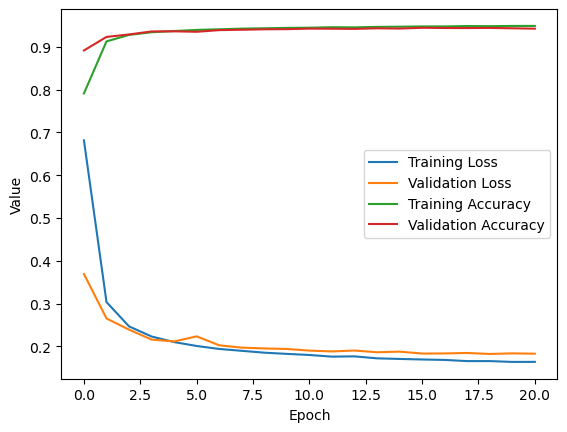

In [136]:
from keras.callbacks import EarlyStopping


# Define early stopping callback to monitor validation loss and stop if it doesn't improve for 5 epochs
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Train the model with 20 epochs and batch size of 32, using the early stopping callback
history = model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop])

# Plot the training history for loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

# Intermediate Model

In [137]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=model.input,outputs=model.layers[-2].output)
intermediate_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 52)]              0         
                                                                 
 dense_28 (Dense)            (None, 100)               5300      
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
Total params: 15,400
Trainable params: 15,400
Non-trainable params: 0
_________________________________________________________________


In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

x_post_ann = intermediate_model.predict(x_train[::10])
y_rf_train = enc.inverse_transform(y_train[::10])



1080/1080 [==============================] - 1s 1ms/step


In [139]:
rf.fit(x_post_ann, y_rf_train)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10156\1192949553.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_post_ann, y_rf_train)


RandomForestClassifier()

In [140]:
x_test_rf = intermediate_model.predict(x_test)
y_test_rf = enc.inverse_transform(y_test)

2700/2700 [==============================] - 4s 1ms/step


In [141]:
y_pred = rf.predict(x_test_rf)

# Evaluate the trained model

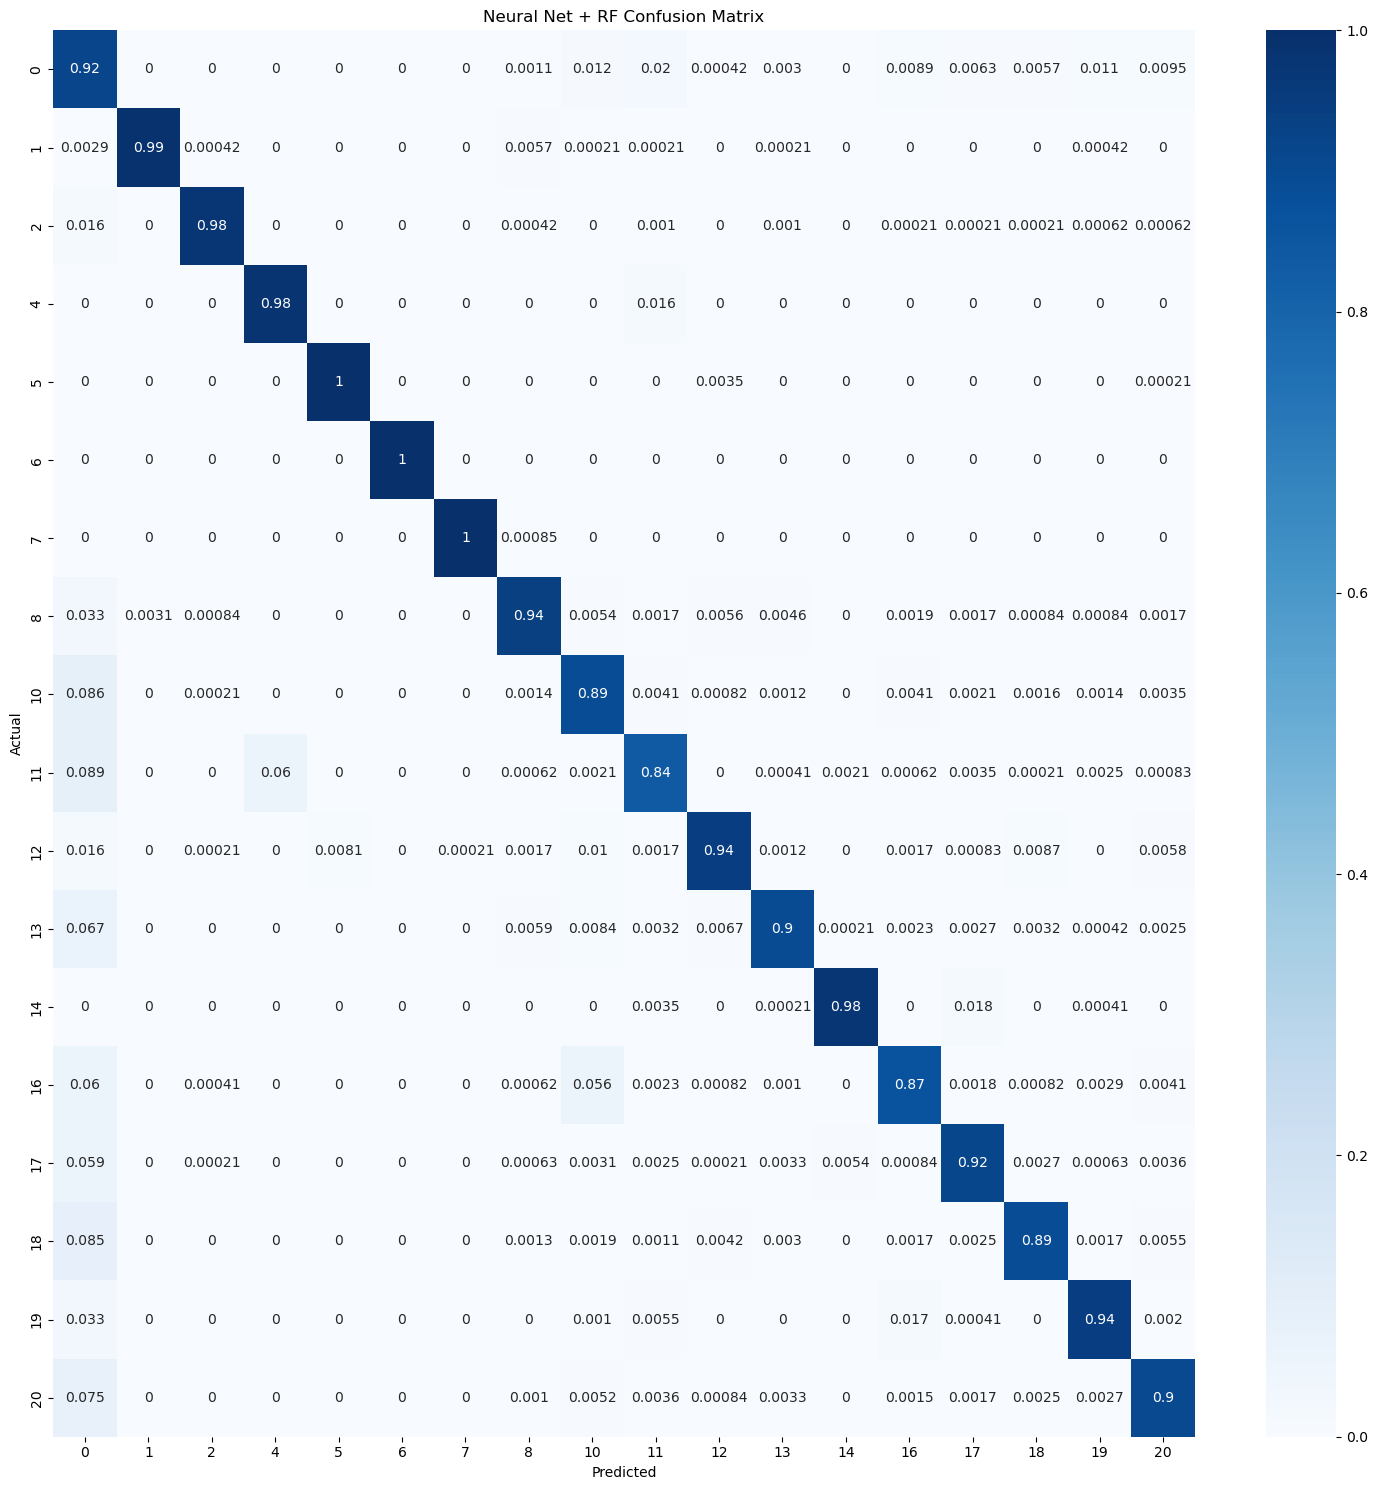

Neural Net + RF accuracy_score: 0.9379166666666666


In [142]:
# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels([str(x) for x in range(0,21) if x not in [3,9,15]])
    ax.set_yticklabels([str(x) for x in range(0,21) if x not in [3,9,15]])
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_test_rf, y_pred, 'Neural Net + RF Confusion Matrix')
print("Neural Net + RF accuracy_score:", accuracy_score(y_test_rf, y_pred))

# Realtime Fault Prediction

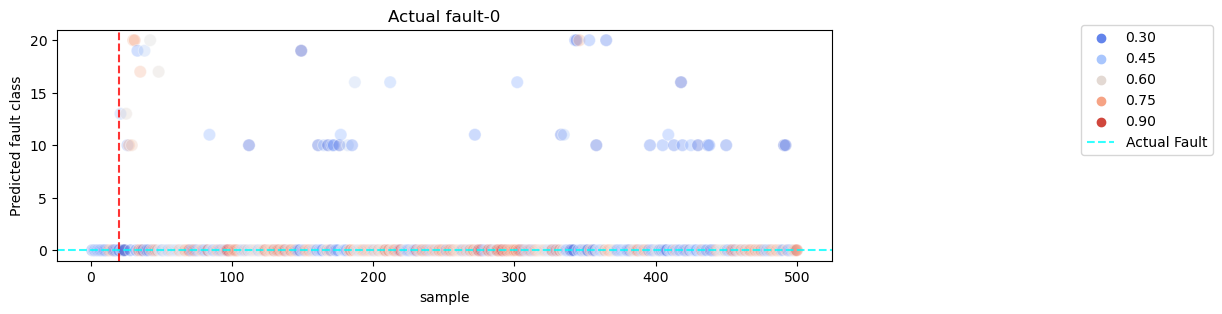

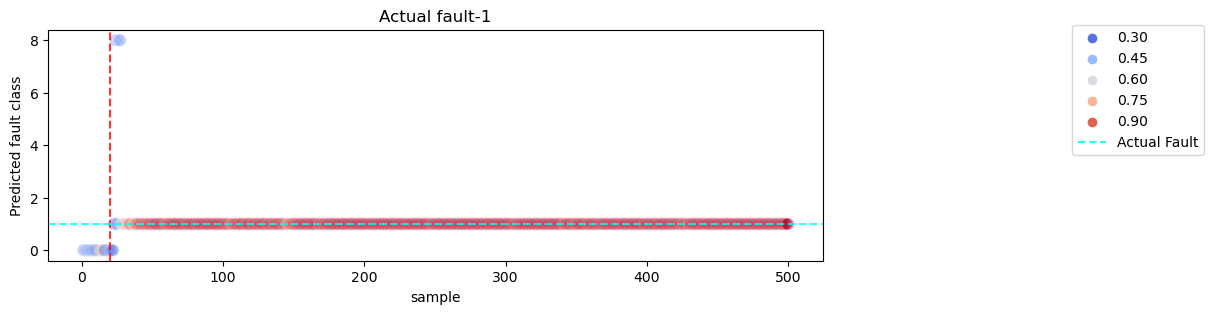

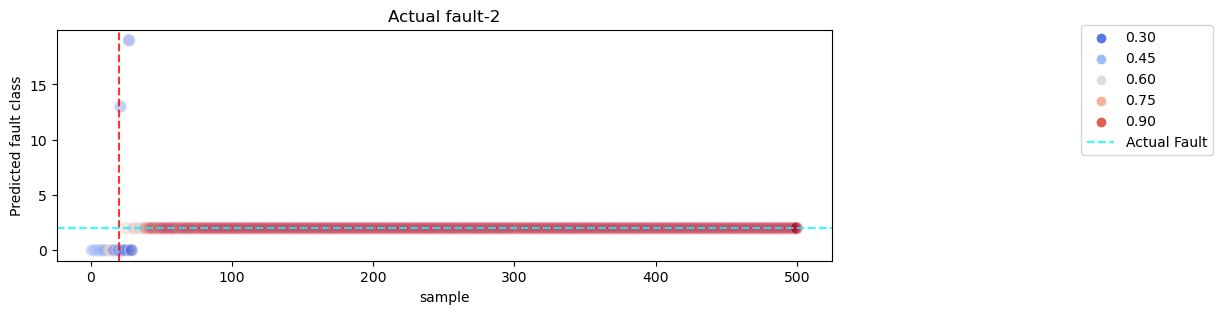

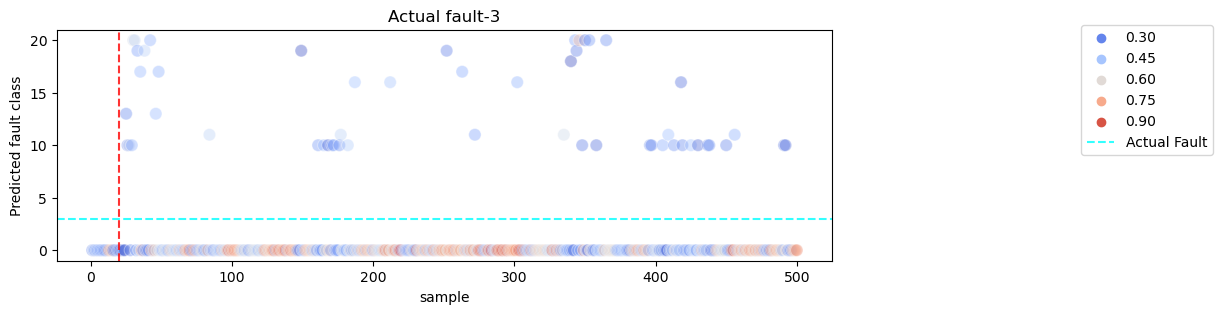

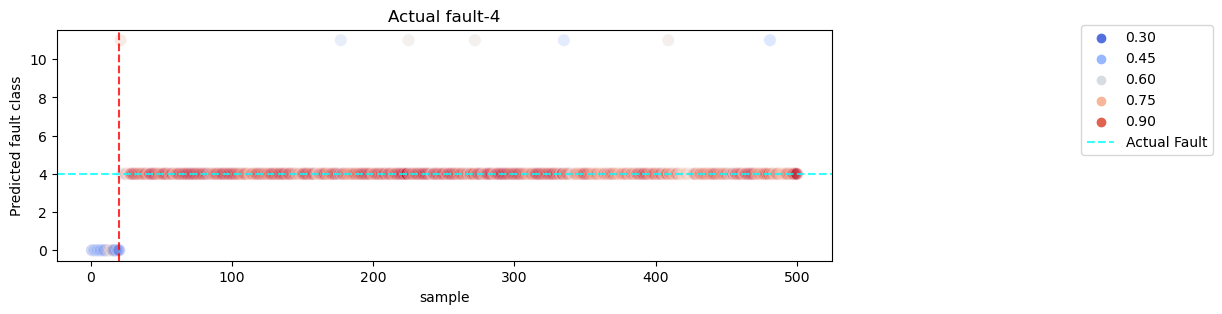

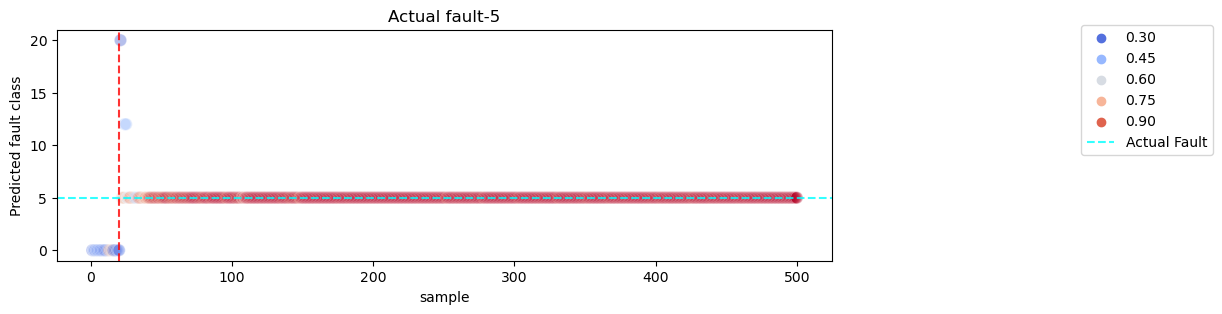

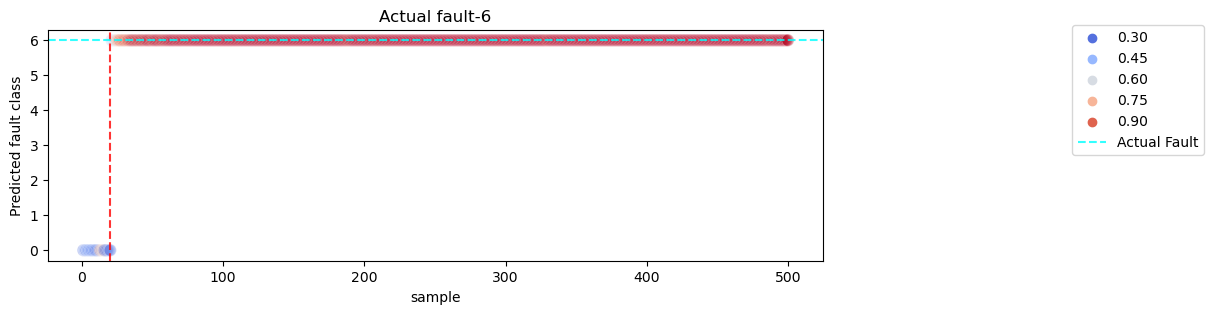

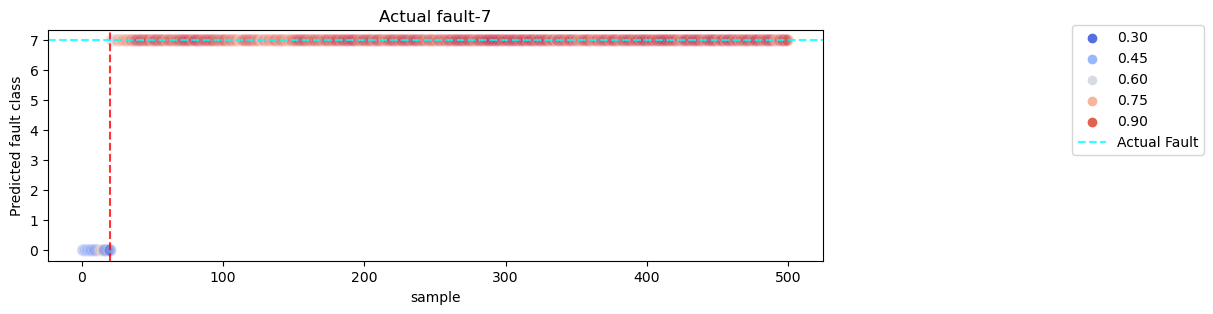

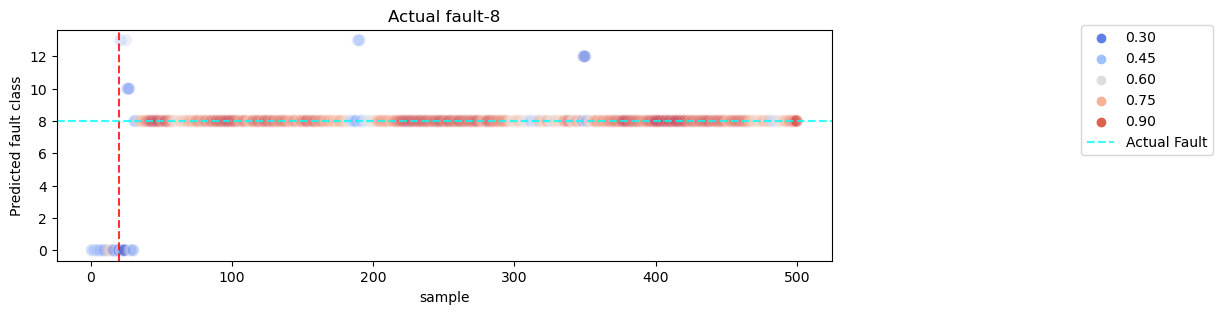

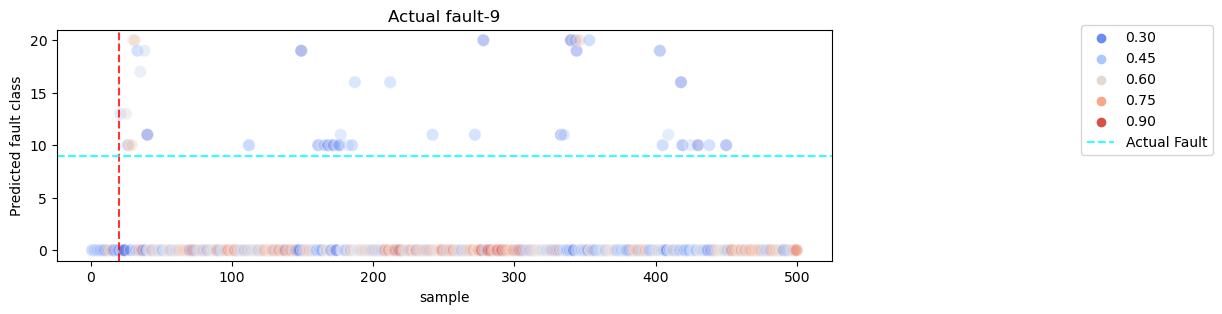

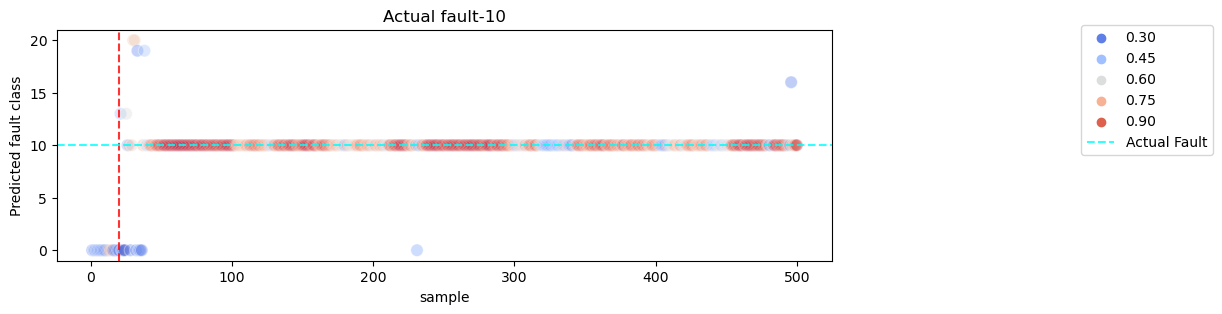

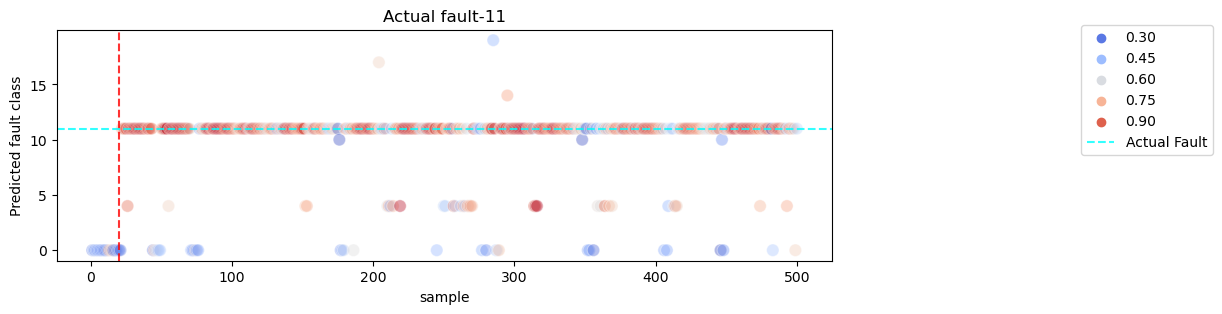

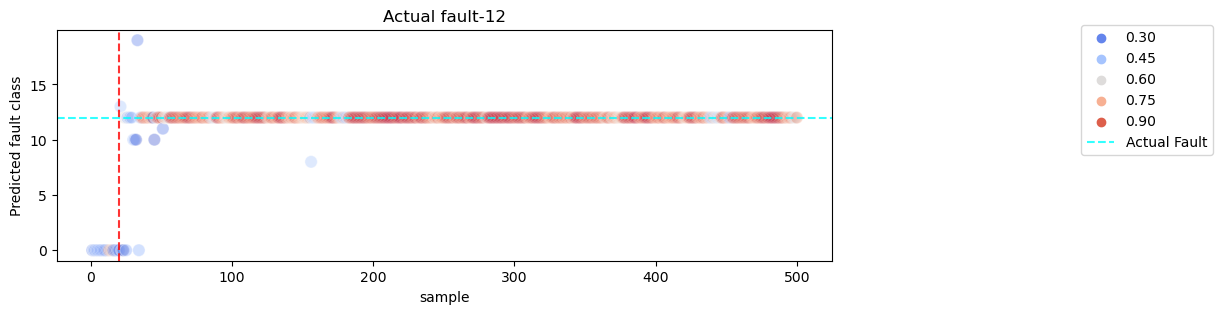

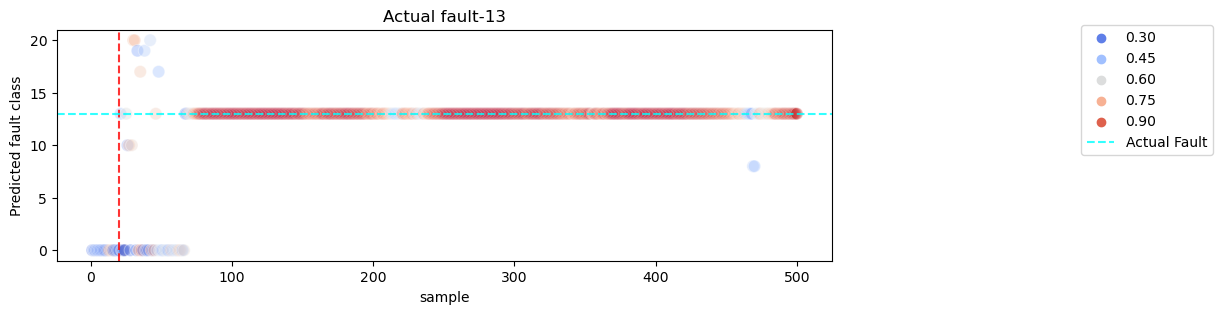

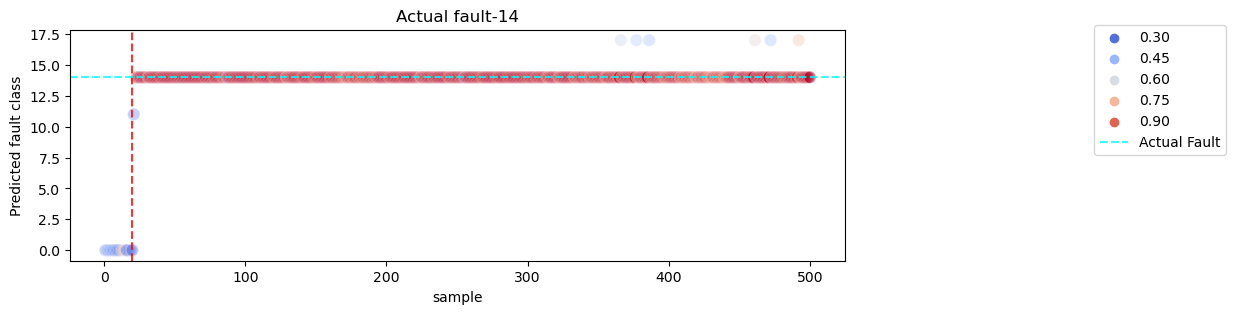

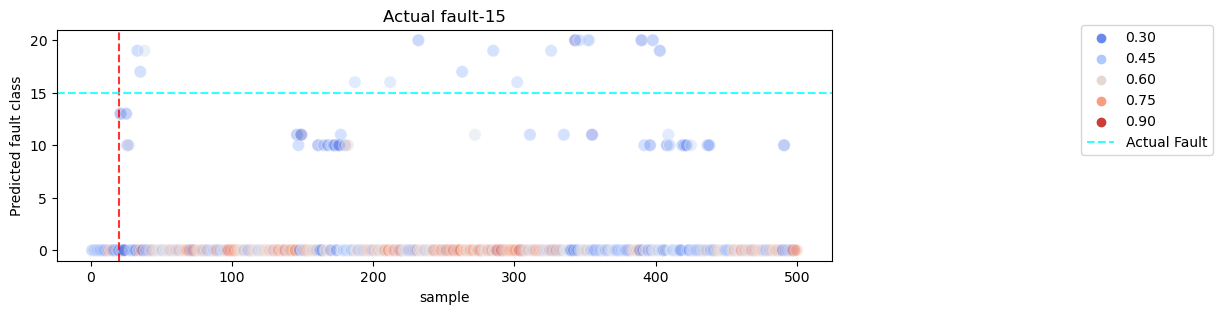

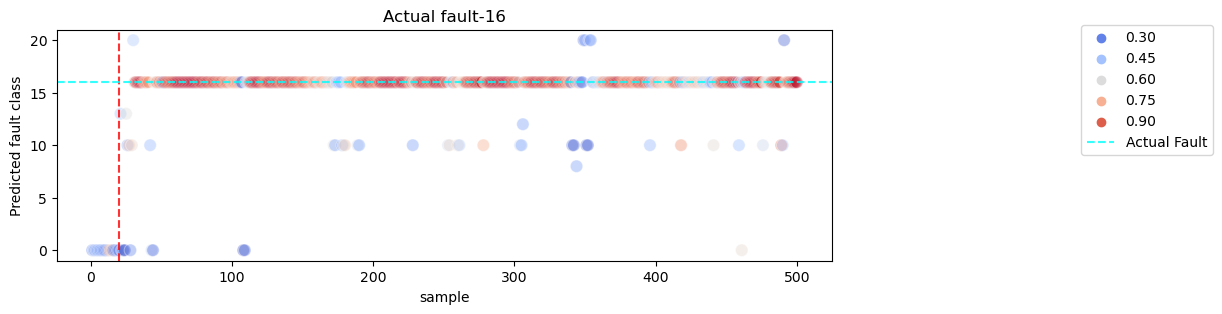

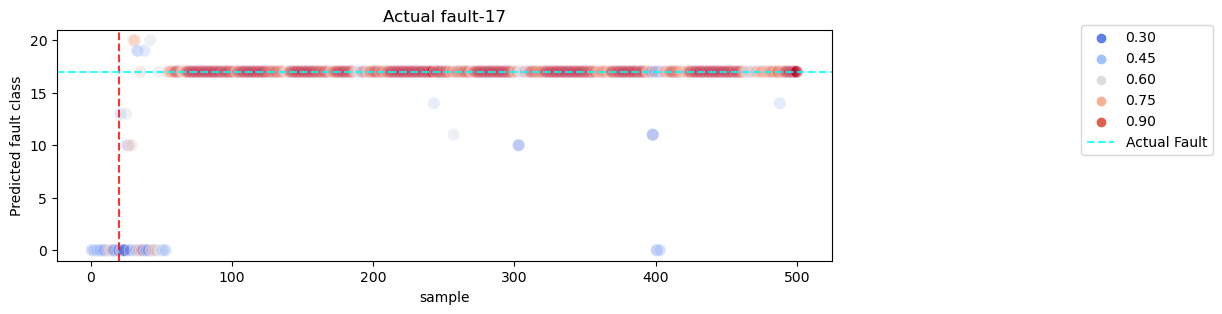

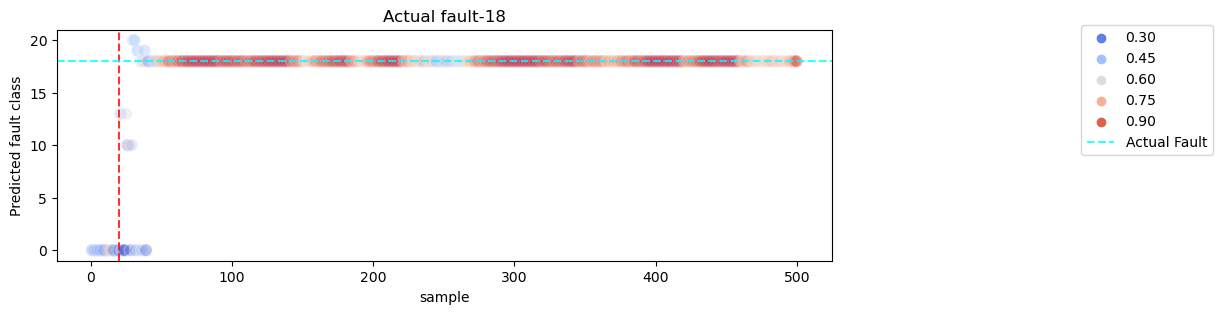

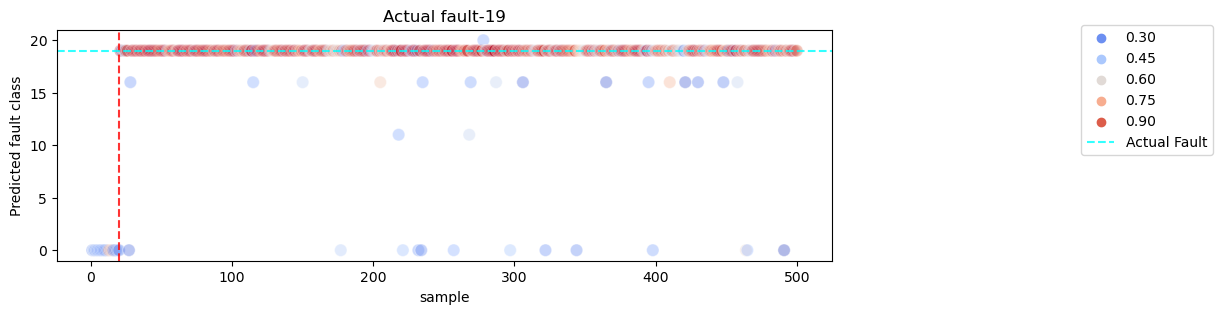

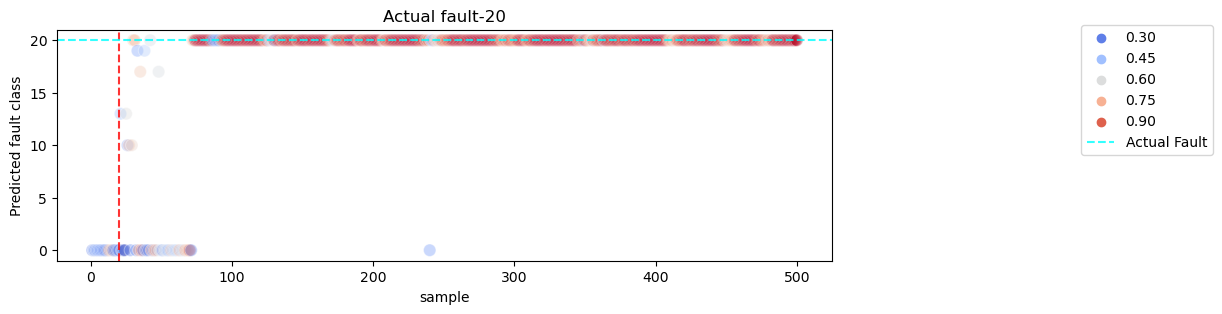

In [144]:
for F_num in range(0,21):
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==2)]
    x_new = df_new.iloc[:,3:]
    x_new = sc.transform(x_new)

    x_nn = intermediate_model.predict(x_new,verbose=0)
    y_pred = rf.predict(x_nn)
    y_proba = np.max(rf.predict_proba(x_nn),axis=1)

    f, ax = plt.subplots(figsize=(10,3))
    
    sns.scatterplot(x=df_new['sample'],y=y_pred,hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()

# Obtain SIngle Accuracy Score matrice

In [147]:
Accuracy=[]
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['sample']>20) & (DF['simulationRun']==np.random.randint(1,500))]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    y_true = temp_df['faultNumber']
    
    x_nn = intermediate_model.predict(X_faulty,verbose=0)
    y_pred = rf.predict(x_nn)
    
    
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    
    Accuracy.append(acc)
print("#"*20)
print(f'The overall accuracy for Neural Net + RF is {np.mean(Accuracy)}')

The accuracy for Fault_num=0 is 0.94375
The accuracy for Fault_num=1 is 0.9833333333333333
The accuracy for Fault_num=2 is 0.9833333333333333
The accuracy for Fault_num=4 is 0.9770833333333333
The accuracy for Fault_num=5 is 0.9979166666666667
The accuracy for Fault_num=6 is 1.0
The accuracy for Fault_num=7 is 1.0
The accuracy for Fault_num=8 is 0.9104166666666667
The accuracy for Fault_num=10 is 0.89375
The accuracy for Fault_num=11 is 0.8666666666666667
The accuracy for Fault_num=12 is 0.9625
The accuracy for Fault_num=13 is 0.8833333333333333
The accuracy for Fault_num=14 is 0.9729166666666667
The accuracy for Fault_num=16 is 0.8875
The accuracy for Fault_num=17 is 0.925
The accuracy for Fault_num=18 is 0.8270833333333333
The accuracy for Fault_num=19 is 0.9458333333333333
The accuracy for Fault_num=20 is 0.8916666666666667
####################
The overall accuracy for Neural Net + RF is 0.9362268518518518
